In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
data = pd.read_csv('./Data/historical_weather_cleaned_filtered.csv')
data.head()

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,day_of_year,year
0,C001,2014-01-01,6.6,-1.4,11.6,1,2014
1,C001,2014-01-02,9.3,6.3,13.3,2,2014
2,C001,2014-01-03,7.6,1.9,14.0,3,2014
3,C001,2014-01-04,7.6,3.9,13.3,4,2014
4,C001,2014-01-05,8.6,0.5,16.9,5,2014


In [112]:
# whether there are missing values
data.isnull().sum()

city_id        0
date           0
avg_temp_c     0
min_temp_c     0
max_temp_c     0
day_of_year    0
year           0
dtype: int64

In [113]:
avg_temp_df = data.pivot(index='date', columns='city_id', values='avg_temp_c')
print("Average Temperature DataFrame:")
avg_temp_df.head()

Average Temperature DataFrame:


city_id,C001,C002,C003,C004,C005,C007,C008,C009,C010,C011,...,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,6.6,16.6,25.8,-4.7,22.1,20.7,5.1,18.7,NaN,1.7,...,11.1,29.8,5.3,19.1,6.7,21.3,5.2,26.4,26.1,NaN
2014-01-02,9.3,16.0,25.8,-4.2,25.4,21.8,5.7,19.6,NaN,3.6,...,8.2,29.9,4.6,19.4,7.6,21.1,5.6,26.2,25.9,NaN
2014-01-03,7.6,16.7,26.8,-5.5,26.2,17.9,4.1,18.9,18.6,0.7,...,8.9,29.9,2.8,19.7,9.2,22.7,7.3,26.7,26.1,NaN
2014-01-04,7.6,18.2,26.1,-5.5,29.3,20.6,7.7,18.7,15.7,2.5,...,8.0,29.8,2.1,21.1,8.4,27.2,3.7,26.3,26.2,NaN
2014-01-05,8.6,16.7,26.1,4.9,24.4,23.7,8.0,19.6,16.3,3.2,...,6.6,29.7,2.5,19.7,6.2,24.0,4.0,26.8,26.1,NaN


In [104]:
# Check for nan
avg_temp_df.isnull().sum()

city_id
C001     0
C002    23
C003     3
C004     0
C005     0
        ..
C108     0
C109     0
C110     1
C111     7
C112    26
Length: 100, dtype: int64

In [85]:
# Forward fill missing values in avg_temp_df
avg_temp_df = avg_temp_df.ffill()
avg_temp_df = avg_temp_df.bfill()

# Check if there are still any missing values
print(avg_temp_df.isnull().sum())


city_id
C001    0
C002    0
C003    0
C004    0
C005    0
       ..
C108    0
C109    0
C110    0
C111    0
C112    0
Length: 100, dtype: int64


In [114]:
min_temp_df = data.pivot(index='date', columns='city_id', values='min_temp_c')

print("Minimum Temperature DataFrame:")
min_temp_df.head()

Minimum Temperature DataFrame:


city_id,C001,C002,C003,C004,C005,C007,C008,C009,C010,C011,...,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,-1.4,11.732847,24.000000,-8.1,18.2,11.6,2.3,14.7,NaN,-0.1,...,5.0,25.3,1.6,13.2,5.6,20.0,-0.2,18.2,22.999286,NaN
2014-01-02,6.3,14.800000,22.000000,-7.4,20.1,12.4,1.8,17.0,NaN,4.0,...,2.0,26.4,3.4,13.7,3.5,13.4,1.1,18.5,22.000000,NaN
2014-01-03,1.9,13.400000,24.373154,-7.9,19.5,13.7,0.9,17.0,14.464493,0.0,...,4.4,25.8,1.0,15.0,7.4,14.8,1.0,21.5,22.999286,NaN
2014-01-04,3.9,16.100000,24.800000,-11.0,22.5,10.7,6.5,17.0,10.500000,1.8,...,5.0,27.5,-2.0,19.4,6.2,18.0,3.2,21.6,23.000000,NaN
2014-01-05,0.5,11.732847,18.000000,-0.3,19.6,11.1,4.8,13.7,11.500000,2.0,...,5.6,28.0,-2.8,16.0,2.6,20.0,1.0,22.4,22.999286,NaN


In [106]:
# Forward fill missing values in avg_temp_df
min_temp_df = avg_temp_df.ffill()
min_temp_df = avg_temp_df.bfill()

# Check if there are still any missing values
print(min_temp_df.isnull().sum())

city_id
C001    0
C002    0
C003    0
C004    0
C005    0
       ..
C108    0
C109    0
C110    0
C111    0
C112    0
Length: 100, dtype: int64


In [115]:
max_temp_df = data.pivot(index='date', columns='city_id', values='max_temp_c')

print("Maximum Temperature DataFrame:")
max_temp_df.head()

Maximum Temperature DataFrame:


city_id,C001,C002,C003,C004,C005,C007,C008,C009,C010,C011,...,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,11.6,16.05082,29.0,-1.3,29.722973,30.2,9.2,24.100000,NaN,4.0,...,21.0,32.3,9.0,24.3,7.9,23.0,16.0,32.600000,30.4,NaN
2014-01-02,13.3,16.05082,29.0,-0.9,32.000000,30.2,8.4,22.100000,NaN,4.3,...,14.5,32.3,6.0,25.7,12.2,26.0,16.1,30.983824,30.0,NaN
2014-01-03,14.0,16.05082,30.9,-3.0,33.000000,26.9,7.9,21.200000,24.6,2.2,...,12.5,33.0,4.5,23.4,10.6,28.0,17.4,32.700000,30.4,NaN
2014-01-04,13.3,16.05082,29.8,0.0,35.200000,29.7,9.6,21.400000,21.8,3.0,...,11.0,32.0,5.0,23.3,12.9,36.0,4.1,34.300000,31.0,NaN
2014-01-05,16.9,16.05082,30.5,10.0,35.900000,34.0,12.1,21.596753,22.5,4.1,...,8.4,32.4,6.1,23.0,8.7,36.3,10.8,32.500000,30.4,NaN


In [107]:
# Forward fill missing values in avg_temp_df
max_temp_df = avg_temp_df.ffill()
max_temp_df = avg_temp_df.bfill()

# Check if there are still any missing values
print(max_temp_df.isnull().sum())

city_id
C001    0
C002    0
C003    0
C004    0
C005    0
       ..
C108    0
C109    0
C110    0
C111    0
C112    0
Length: 100, dtype: int64


In [116]:
from statsmodels.tsa.arima.model import ARIMA

In [117]:
# Convert the index to datetime
avg_temp_df.index = pd.to_datetime(avg_temp_df.index)

In [118]:
# Split the data into training and test sets
train_data = avg_temp_df[:'2018-12-24']
test_data = avg_temp_df['2018-12-25':'2018-12-31']

# check for nan values
print("Train Data:")
print(train_data.isnull().sum())
print("Test Data:")
print(test_data.isnull().sum())

Train Data:
city_id
C001     0
C002    23
C003     3
C004     0
C005     0
        ..
C108     0
C109     0
C110     1
C111     7
C112    26
Length: 100, dtype: int64
Test Data:
city_id
C001    0
C002    0
C003    0
C004    0
C005    0
       ..
C108    0
C109    0
C110    0
C111    0
C112    0
Length: 100, dtype: int64


In [119]:
# Create a DataFrame to store predictions
predictions = pd.DataFrame(index=test_data.index, columns=avg_temp_df.columns)

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
rmse_list = []

# Train an ARIMA model for each city and make predictions
for city in avg_temp_df.columns:
    # Train the ARIMA model
    model = ARIMA(train_data[city], order=(5, 1, 0))  # The order (5, 1, 0) can be adjusted based on performance
    model_fit = model.fit()
    
    # Forecast the average temperature for the last week of 2018
    forecast = model_fit.forecast(steps=7)
    
    # Store the forecast in the predictions DataFrame
    predictions[city] = forecast.values
    
    # Print forecast and test_data to debug
    print(f"Forecast for {city}:")
    print(forecast)
    print(f"Test data for {city}:")
    print(test_data[city])
    
    # Check for NaN values in forecast
    if np.isnan(forecast).any():
        print(f"NaN values found in forecast for {city}")
    
    # Calculate RMSE for the city
    rmse = np.sqrt(mean_squared_error(test_data[city], forecast))
    rmse_list.append(rmse)

# Calculate the average RMSE across all cities
average_rmse = np.mean(rmse_list)

Forecast for C001:
1818    9.059001
1819    8.708012
1820    8.526242
1821    8.492087
1822    8.582615
1823    8.674503
1824    8.705161
Name: predicted_mean, dtype: float64
Test data for C001:
date
2018-12-25     9.0
2018-12-26     9.4
2018-12-27     9.7
2018-12-28    10.1
2018-12-29     8.9
2018-12-30    10.7
2018-12-31    11.8
Name: C001, dtype: float64
Forecast for C002:
1818    16.058270
1819    15.669765
1820    15.521825
1821    15.573830
1822    15.574913
1823    15.656705
1824    15.682211
Name: predicted_mean, dtype: float64
Test data for C002:
date
2018-12-25    15.5
2018-12-26    16.6
2018-12-27    14.8
2018-12-28    14.7
2018-12-29    13.3
2018-12-30    13.5
2018-12-31    14.0
Name: C002, dtype: float64
Forecast for C003:
1818    26.546688
1819    26.457364
1820    26.444987
1821    26.413494
1822    26.359875
1823    26.412298
1824    26.431740
Name: predicted_mean, dtype: float64
Test data for C003:
date
2018-12-25    27.0
2018-12-26    26.6
2018-12-27    27.6
2018-12-2

In [122]:
print("Predictions for the last week of 2018:")
print(predictions)
print(f"RMSE for each city: {rmse_list}")
print(f"Average RMSE across all cities: {average_rmse}")

Predictions for the last week of 2018:
city_id         C001       C002       C003      C004       C005       C007  \
date                                                                         
2018-12-25  9.059001  16.058270  26.546688  3.917557  20.981488  18.896487   
2018-12-26  8.708012  15.669765  26.457364  1.307547  22.138157  17.721075   
2018-12-27  8.526242  15.521825  26.444987  0.734905  22.732695  17.666564   
2018-12-28  8.492087  15.573830  26.413494  0.812490  22.900302  17.564101   
2018-12-29  8.582615  15.574913  26.359875  1.285626  22.770549  17.948397   
2018-12-30  8.674503  15.656705  26.412298  1.877946  22.413005  18.304817   
2018-12-31  8.705161  15.682211  26.431740  1.819768  22.238265  18.262843   

city_id         C008       C009       C010      C011  ...      C103  \
date                                                  ...             
2018-12-25  9.743070  22.035843  19.157957 -0.849989  ...  2.624382   
2018-12-26  7.546421  21.934762  19.414363 -0

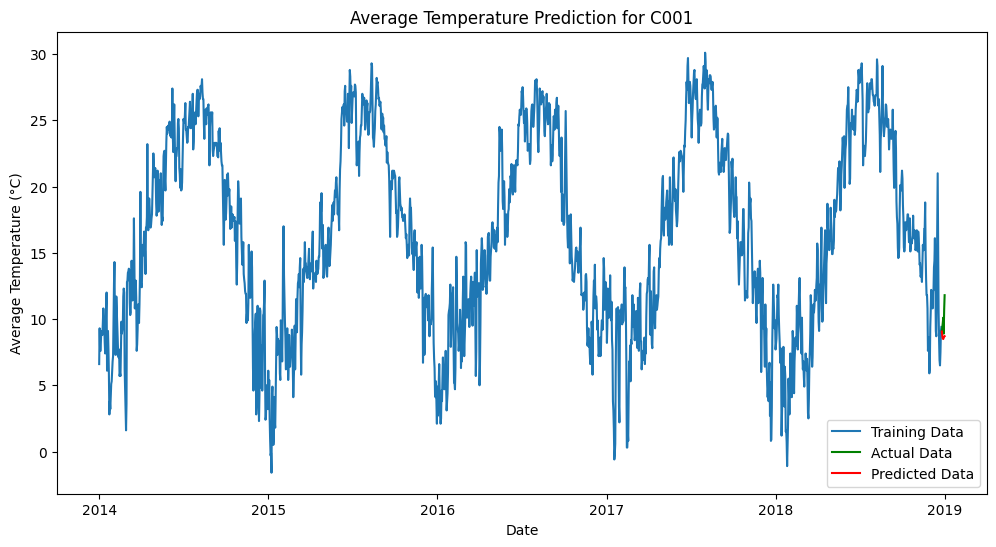

In [123]:
city_to_plot = 'C001'  # Change to any city_id you want to plot
plt.figure(figsize=(12, 6))
plt.plot(train_data[city_to_plot], label='Training Data')
plt.plot(test_data[city_to_plot], label='Actual Data', color='green')
plt.plot(predictions[city_to_plot], label='Predicted Data', color='red')
plt.title(f'Average Temperature Prediction for {city_to_plot}')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

In [129]:
# Split the data into training and test sets
train_data_2 = avg_temp_df['2015-01-01':'2017-12-31']
test_data_2 = avg_temp_df['2018-01-01':'2018-01-07']

In [130]:
# Create a DataFrame to store predictions
predictions = pd.DataFrame(index=test_data_2.index, columns=avg_temp_df.columns)

In [131]:
rmse_list = []

# Train an ARIMA model for each city and make predictions
for city in avg_temp_df.columns:
    # Train the ARIMA model
    model = ARIMA(train_data_2[city], order=(5, 1, 0))  # The order (5, 1, 0) can be adjusted based on performance
    model_fit = model.fit()
    
    # Forecast the average temperature for the last week of 2018
    forecast = model_fit.forecast(steps=7)
    
    # Store the forecast in the predictions DataFrame
    predictions[city] = forecast.values
    
    # Print forecast and test_data to debug
    print(f"Forecast for {city}:")
    print(forecast)
    print(f"Test data for {city}:")
    print(test_data_2[city])
    
    # Check for NaN values in forecast
    if np.isnan(forecast).any():
        print(f"NaN values found in forecast for {city}")
    
    # Calculate RMSE for the city
    rmse = np.sqrt(mean_squared_error(test_data_2[city], forecast))
    rmse_list.append(rmse)

# Calculate the average RMSE across all cities
average_rmse = np.mean(rmse_list)

Forecast for C001:
1095    7.749650
1096    8.344414
1097    8.665370
1098    8.599244
1099    8.689005
1100    8.638625
1101    8.546323
Name: predicted_mean, dtype: float64
Test data for C001:
date
2018-01-01     8.1
2018-01-02     8.5
2018-01-03     9.6
2018-01-04    11.8
2018-01-05    11.6
2018-01-06    12.6
2018-01-07    10.3
Name: C001, dtype: float64
Forecast for C002:
1095    14.858227
1096    15.638093
1097    15.854625
1098    15.817694
1099    15.739552
1100    15.512695
1101    15.473994
Name: predicted_mean, dtype: float64
Test data for C002:
date
2018-01-01    13.3
2018-01-02    13.6
2018-01-03    12.3
2018-01-04    15.2
2018-01-05    15.3
2018-01-06    11.2
2018-01-07    11.9
Name: C002, dtype: float64
Forecast for C003:
1095    25.208734
1096    25.260393
1097    25.059207
1098    25.138944
1099    25.156490
1100    25.144049
1101    25.150089
Name: predicted_mean, dtype: float64
Test data for C003:
date
2018-01-01    26.1
2018-01-02    25.8
2018-01-03    26.3
2018-01-0

In [132]:
print("Predictions for the last week of 2018:")
print(predictions)
print(f"RMSE for each city: {rmse_list}")
print(f"Average RMSE across all cities: {average_rmse}")

Predictions for the last week of 2018:
city_id         C001       C002       C003      C004       C005       C007  \
date                                                                         
2018-01-01  7.749650  14.858227  25.208734 -2.373208  26.343259  19.250144   
2018-01-02  8.344414  15.638093  25.260393 -1.275934  26.527136  17.984968   
2018-01-03  8.665370  15.854625  25.059207 -1.135726  26.843522  17.787765   
2018-01-04  8.599244  15.817694  25.138944 -1.297971  27.203496  18.079154   
2018-01-05  8.689005  15.739552  25.156490 -1.602301  27.381528  18.474260   
2018-01-06  8.638625  15.512695  25.144049 -1.783009  27.252344  18.684321   
2018-01-07  8.546323  15.473994  25.150089 -1.677722  27.089549  18.591708   

city_id          C008       C009       C010      C011  ...      C103  \
date                                                   ...             
2018-01-01  11.868965  19.042013  19.098587  0.299245  ...  1.432399   
2018-01-02   9.054579  18.844685  19.11313

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [125]:
# List to store RMSE values for each city
rmse_list = []

# Train a SARIMA model for each city and make predictions
for city in avg_temp_df.columns:
    # Train the SARIMA model (seasonal_order can be adjusted based on seasonal patterns)
    model = SARIMAX(train_data[city], order=(5, 1, 0), seasonal_order=(1, 0, 1, 7))  
    model_fit = model.fit(disp=False)
    
    # Forecast the average temperature for the last week of 2018
    forecast = model_fit.get_forecast(steps=7)
    forecast_mean = forecast.predicted_mean
    
    # Store the forecast in the predictions DataFrame
    predictions[city] = forecast_mean.values
    
    # Calculate RMSE for the city
    rmse = np.sqrt(mean_squared_error(test_data[city], forecast_mean))
    rmse_list.append(rmse)

# Calculate the average RMSE across all cities
average_rmse = np.mean(rmse_list)

In [126]:
print("Predictions for the last week of 2018 using SARIMA:")
print(predictions)
print(f"Average RMSE across all cities: {average_rmse}")

Predictions for the last week of 2018 using SARIMA:
city_id         C001       C002       C003      C004       C005       C007  \
date                                                                         
2018-12-25  9.341643  16.174221  26.554257  3.882685  20.799924  18.854383   
2018-12-26  9.000804  15.746007  26.430578  1.422202  22.090592  17.508367   
2018-12-27  8.945895  15.574715  26.419057  0.820743  22.698904  17.407689   
2018-12-28  9.150306  15.636360  26.378251  0.874642  22.938645  17.160395   
2018-12-29  9.364779  15.594954  26.346351  1.374524  22.660949  17.749583   
2018-12-30  9.541967  15.707528  26.457813  2.163945  22.388911  17.912355   
2018-12-31  9.289722  15.666174  26.417015  1.592459  22.618345  17.773007   

city_id         C008       C009       C010      C011  ...      C103  \
date                                                  ...             
2018-12-25  9.815070  22.078453  19.171724 -0.826094  ...  2.744379   
2018-12-26  7.575641  21.979482 

In [97]:
from itertools import product

In [54]:
# Split the data into training and test sets
train_data = avg_temp_df[:'2018-12-24']
test_data = avg_temp_df['2018-12-25':'2018-12-31']

# Define parameter grid for SARIMA
p = d = q = range(0, 2)  # Reduced range for initial testing
P = D = Q = range(0, 2)  # Reduced range for initial testing
s = [7]  # Weekly seasonality
param_grid = list(product(product(p, d, q), product(P, D, Q, s)))


In [55]:
# Define a function to perform grid search for SARIMA parameters
def sarima_grid_search(train_series, test_series, param_grid):
    best_score, best_cfg = float("inf"), None
    for param in param_grid:
        try:
            model = SARIMAX(train_series, order=param[0], seasonal_order=param[1])
            model_fit = model.fit(disp=False)
            forecast = model_fit.forecast(steps=len(test_series))
            rmse = np.sqrt(mean_squared_error(test_series, forecast))
            if rmse < best_score:
                best_score, best_cfg = rmse, param
        except:
            continue
    return best_cfg, best_score

In [56]:
# Function to fit and forecast for each city
def fit_and_forecast(city):
    train_series = train_data[city].dropna()
    test_series = test_data[city].dropna()
    
    # Perform grid search
    best_cfg, best_score = sarima_grid_search(train_series, test_series, param_grid)
    
    # Fit the best SARIMA model
    model = SARIMAX(train_series, order=best_cfg[0], seasonal_order=best_cfg[1])
    model_fit = model.fit(disp=False)
    
    # Forecast the average temperature for the test set period (2018-12-25 to 2018-12-31)
    forecast = model_fit.forecast(steps=len(test_series))
    
    # Calculate RMSE for the city
    rmse = np.sqrt(mean_squared_error(test_series, forecast))
    
    return city, forecast.values, rmse

In [57]:
from joblib import Parallel, delayed
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

In [58]:
# List to store RMSE values for each city
results = Parallel(n_jobs=-1)(delayed(fit_and_forecast)(city) for city in avg_temp_df.columns)


KeyboardInterrupt: 

In [ ]:
# Extract predictions and RMSE values
predictions = {result[0]: result[1] for result in results}
rmse_list = [result[2] for result in results]

# Calculate the average RMSE across all cities
average_rmse = np.mean(rmse_list)

In [ ]:
print(f"Average RMSE across all cities: {average_rmse}")

# Print the predictions for the last week of 2018
pred_df = pd.DataFrame(predictions, index=test_data.index)
print("Predictions for the last week of 2018:")
print(pred_df)

Average RMSE across all cities: 1.513358899326642
Predictions for the last week of 2018:
                 C001       C002       C003      C004       C005       C007  \
date                                                                          
2018-12-25   9.488222  14.943828  26.821110  4.829914  21.525753  21.015867   
2018-12-26   9.587940  15.517333  26.891279  1.123149  22.133364  20.580536   
2018-12-27   9.579719  15.111915  26.858828  0.321770  22.490057  20.550810   
2018-12-28   9.853660  14.585673  26.441613 -0.106626  22.714510  20.662412   
2018-12-29  10.233726  15.159419  26.652796 -2.080924  22.837710  20.551904   
2018-12-30  10.645348  14.988963  26.397529 -1.468492  23.024644  20.793715   
2018-12-31  10.927734  16.449646  26.606951  2.477279  23.234219  21.047038   

                C008       C009       C010      C011  ...      C103  \
date                                                  ...             
2018-12-25  6.879837  20.881856  19.124795 -4.392308  ...

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Function to prepare data for XGBoost
def prepare_xgb_data(city_data, n_lags=7):
    X, y = [], []
    for i in range(n_lags, len(city_data)):
        X.append(city_data[i-n_lags:i])
        y.append(city_data[i])
    return np.array(X), np.array(y)

In [ ]:
# Function to train XGBoost model
def train_xgb_model(train_data, test_data):
    predictions = {}
    rmse_list = []
    for city in avg_temp_df.columns:
        train_series = train_data[city].dropna()
        test_series = test_data[city].dropna()

        X_train, y_train = prepare_xgb_data(train_series.values)
        X_test, y_test = prepare_xgb_data(np.concatenate([train_series.values[-7:], test_series.values]))

        # Initialize and fit the model
        model = XGBRegressor(objective='reg:squarederror')
        model.fit(X_train, y_train)

        # Forecast the average temperature for the test set period (2018-12-25 to 2018-12-31)
        forecast = model.predict(X_test)

        # Store the forecast in the predictions dictionary
        predictions[city] = forecast

        # Calculate RMSE for the city
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        rmse_list.append(rmse)
        print(f"RMSE for {city}: {rmse}")

    # Calculate the average RMSE across all cities
    average_rmse = np.mean(rmse_list)
    print(f"Average RMSE across all cities: {average_rmse}")

    return predictions

In [ ]:
# Train XGBoost models and get predictions
predictions_xgb = train_xgb_model(train_data, test_data)

RMSE for C001: 1.2543542621941288
RMSE for C002: 1.3930397189111925
RMSE for C003: 0.7143296746041221
RMSE for C004: 3.2131002522854133
RMSE for C005: 1.919338312345123
RMSE for C007: 2.98233723376469
RMSE for C008: 2.9562611738599855
RMSE for C009: 1.8972392559863018
RMSE for C010: 1.7733905369980023
RMSE for C011: 3.044564093819313
RMSE for C012: 3.384837011227436
RMSE for C013: 2.4274943235905386
RMSE for C014: 3.2850794062776227
RMSE for C015: 0.8140046448091395
RMSE for C016: 0.7978850486322383
RMSE for C017: 1.1533000540588514
RMSE for C018: 2.4848195207156167
RMSE for C020: 0.8714608413641772
RMSE for C022: 2.249101643225109
RMSE for C023: 2.5083412534976706
RMSE for C024: 2.402268332527466
RMSE for C025: 5.010264662984513
RMSE for C027: 4.836477769610275
RMSE for C028: 0.3517883986053112
RMSE for C029: 1.109328477481987
RMSE for C030: 0.652635785742896
RMSE for C031: 3.0567490617193753
RMSE for C033: 2.784621578679616
RMSE for C034: 3.5998881016996567
RMSE for C035: 0.628250274

In [ ]:
# Print predictions for the last week of 2018
pred_xgb_df = pd.DataFrame(predictions_xgb, index=test_data.index, columns=test_data.columns)
print("Predictions for the last week of 2018 (XGBoost):")
print(pred_xgb_df)

Predictions for the last week of 2018 (XGBoost):
city_id          C001       C002       C003      C004       C005       C007  \
date                                                                          
2018-12-25   9.488024  16.798227  26.496153 -1.424400  19.593859  18.824524   
2018-12-26   8.746376  16.007124  26.773262  0.075960  19.206539  17.764757   
2018-12-27  11.476731  16.614470  26.682917 -0.067582  23.604626  20.939322   
2018-12-28  10.594682  16.299595  27.719625 -0.615862  23.422199  19.912193   
2018-12-29  10.514126  15.059731  26.767487 -2.272619  24.336916  20.533318   
2018-12-30   8.616521  11.924757  26.529202 -3.098697  23.610399  16.979244   
2018-12-31  11.825871  14.343476  27.270922 -1.402838  26.154999  18.661579   

city_id          C008       C009       C010      C011  ...      C103  \
date                                                   ...             
2018-12-25  12.888697  23.362570  18.433619  0.101155  ...  1.548644   
2018-12-26   4.141137  

In [127]:
# List to store RMSE values for each city
rmse_list = []

# DataFrame to store predictions
predictions = pd.DataFrame(index=test_data.index, columns=avg_temp_df.columns)

# Train a SARIMA model for each city using min and max temperatures and predict average temperature
for city in avg_temp_df.columns:
    # Train the SARIMA model using min temperature
    model_min = SARIMAX(min_temp_df[city], order=(5, 1, 0), seasonal_order=(1, 0, 1, 7))
    model_fit_min = model_min.fit(disp=False)
    forecast_min = model_fit_min.get_forecast(steps=7)
    
    # Train the SARIMA model using max temperature
    model_max = SARIMAX(max_temp_df[city], order=(5, 1, 0), seasonal_order=(1, 0, 1, 7))
    model_fit_max = model_max.fit(disp=False)
    forecast_max = model_fit_max.get_forecast(steps=7)
    
    # Calculate average temperature forecast based on min and max temperature forecasts
    forecast_avg = (forecast_min.predicted_mean + forecast_max.predicted_mean) / 2
    
    # Store the forecast in the predictions DataFrame
    predictions[city] = forecast_avg.values
    
    # Calculate RMSE for the city
    rmse = np.sqrt(mean_squared_error(test_data[city], forecast_avg))
    rmse_list.append(rmse)

# Calculate the average RMSE across all cities
average_rmse = np.mean(rmse_list)


In [128]:
# Print predictions and average RMSE
print("Predictions for the last week of 2018 using SARIMA (Average Temperature):")
print(predictions)
print(f"Average RMSE across all cities: {average_rmse}")

Predictions for the last week of 2018 using SARIMA (Average Temperature):
city_id          C001       C002       C003      C004       C005       C007  \
date                                                                          
2018-12-25  11.685527  15.643451  27.435756  0.612626  28.318946  20.342824   
2018-12-26  11.416550  15.495642  27.523073 -1.026284  26.935258  20.201860   
2018-12-27  11.362590  15.520900  27.453332 -1.602996  26.403727  19.990239   
2018-12-28  11.143934  15.396596  27.575530 -1.726018  26.175897  19.956958   
2018-12-29  11.245080  15.511979  27.474209 -0.946475  26.493697  19.825656   
2018-12-30  11.249998  15.555268  27.471447 -0.376989  26.585791  19.997227   
2018-12-31  11.233562  15.554856  27.469496 -0.907288  26.402497  20.074671   

city_id         C008       C009       C010      C011  ...      C103  \
date                                                  ...             
2018-12-25  5.055447  18.341157  18.962974 -0.168854  ...  4.216698   
2